In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
g = "H2O"

In [46]:
janaf = np.loadtxt("cp/dat/%s.csv"%g, delimiter=',').T
jan_t = janaf[0]
jan_c = janaf[1]

In [47]:
def shomate(t:float, gas:str):

    match gas:
        case "H2O":
            if t < 1700:
                A= 30.09200	
                B= 6.832514	
                C= 6.793435	
                D= -2.534480
                E= 0.082139	
            else:
                A= 41.96426
                B= 8.622053
                C= -1.499780
                D= 0.098119
                E= -11.15764

        case "CH4":
            if t < 1300:
                A= 	-0.703029	
                B= 	108.4773	
                C= 	-42.52157	
                D= 	5.862788	
                E= 	0.678565	
            else:
                A= 	85.81217
                B= 	11.26467
                C= 	-2.114146
                D= 	0.138190
                E= 	-26.42221
        
        case _:
            raise Exception("Invalid gas %s"%gas)

    t = t / 1000.0
    t2 = t*t
    t3 = t2 * t 
    out = A + B*t + C*t2 + D*t3 + E/t2

    return out

/var/folders/c5/7g0qsrx909jb32805xkxksgc0000gp/T/ipykernel_56487/909241770.py:38: RuntimeWarning: divide by zero encountered in scalar divide
  out = A + B*t + C*t2 + D*t3 + E/t2


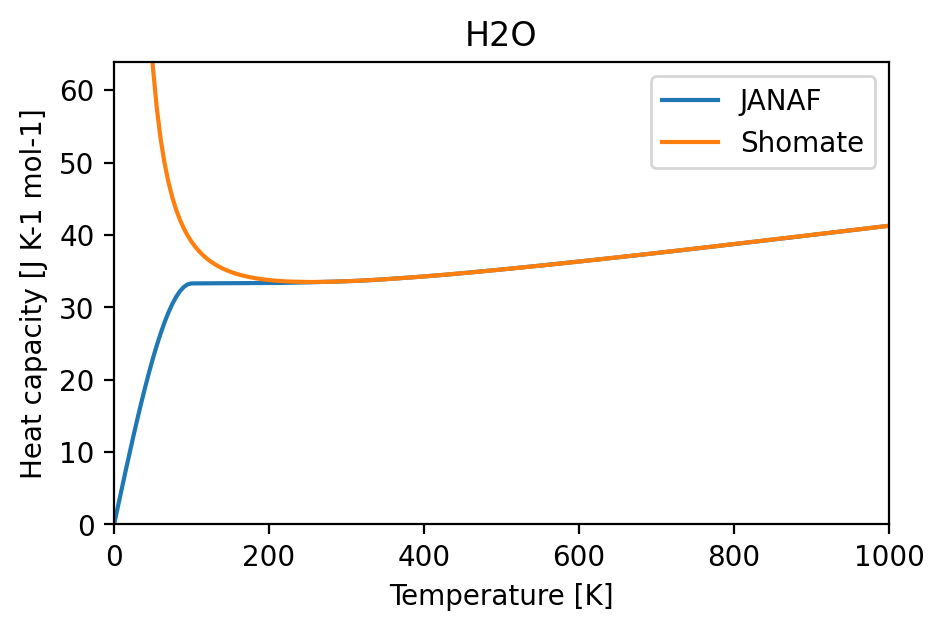

In [48]:
plt.close("all")

fig,ax = plt.subplots(1,1, figsize=(5,3))

sho_c = [shomate(t, g) for t in jan_t]

ax.plot(jan_t, jan_c, label="JANAF")
ax.plot(jan_t, sho_c, label="Shomate")

ax.set_ylim(0, np.amax(jan_c)*1.1)
ax.set_xlim(0, 1000)

ax.set_ylabel("Heat capacity [J K-1 mol-1]")
ax.set_xlabel("Temperature [K]")

ax.legend()
ax.set_title(g)

plt.show()